Inspiration from the following web page: https://towardsdatascience.com/implementing-the-steepest-descent-algorithm-in-python-from-scratch-d32da2906fe2#22bb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    '''Objective function'''
    return 0.5*(x[0] - 4.5)**2 + 2.5*(x[1] - 2.3)**2

def df(x):
    '''Gradient of the objective function'''
    return np.array([x[0] - 4.5, 5*(x[1] - 2.3)])

x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

x1

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [3]:
def steepest_descent(gradient, x0 = np.zeros(2), alpha = 0.01, max_iter = 10000, tolerance = 1e-10):
    '''
    Steepest descent with constant step size alpha.

    Args:
      - gradient: gradient of the objective function
      - alpha: line search parameter (default: 0.01)
      - x0: initial guess for x_0 and x_1 (default values: zero) <numpy.ndarray>
      - max_iter: maximum number of iterations (default: 10000)
      - tolerance: minimum gradient magnitude at which the algorithm stops (default: 1e-10)

    Out:
      - results: <numpy.ndarray> of size (n_iter, 2) with x_0 and x_1 values at each iteration
    '''

    # Initialize the iteration counter
    iter_count = 1

    # Prepare list to store results at each iteration
    results = np.array([])

    # Evaluate the gradient at the starting point
    gradient_x = gradient(x0)
    print(gradient_x)
    # Gradient values in a list
    gradients = gradient_x

    # Set the initial point
    x = x0
    results = np.append(results, x, axis=0)

    # Iterate until the gradient is below the tolerance or maximum number of iterations is reached
    # Stopping criterion: inf norm of the gradient (max abs)
    while any(abs(gradient_x) > tolerance) and iter_count < max_iter:

        # Update the current point by moving in the direction of the negative gradient
        x = x - alpha * gradient_x

        # Store the result
        results = np.append(results, x, axis=0)

        # Evaluate the gradient at the new point
        gradient_x = gradient(x)

        # add gradient value to list
        gradients = np.append(gradients,gradient_x)

        # Increment the iteration counter
        iter_count += 1

    # Return the points obtained at each iteration
    return results.reshape(-1, 2),gradients.reshape(int(-1),2)

In [4]:
estimate,gradients = steepest_descent(df, x0 = np.array([-9, -9]), alpha=0.30)

print('Final results: {}'.format(estimate[-1]))
print('N° iterations: {}'.format(len(estimate)))

[-13.5 -56.5]
Final results: [4.5 2.3]
N° iterations: 73


In [5]:
estimate

array([[-9.        , -9.        ],
       [-4.95      ,  7.95      ],
       [-2.115     , -0.525     ],
       [-0.1305    ,  3.7125    ],
       [ 1.25865   ,  1.59375   ],
       [ 2.231055  ,  2.653125  ],
       [ 2.9117385 ,  2.1234375 ],
       [ 3.38821695,  2.38828125],
       [ 3.72175186,  2.25585938],
       [ 3.95522631,  2.32207031],
       [ 4.11865841,  2.28896484],
       [ 4.23306089,  2.30551758],
       [ 4.31314262,  2.29724121],
       [ 4.36919984,  2.30137939],
       [ 4.40843989,  2.2993103 ],
       [ 4.43590792,  2.30034485],
       [ 4.45513554,  2.29982758],
       [ 4.46859488,  2.30008621],
       [ 4.47801642,  2.29995689],
       [ 4.48461149,  2.30002155],
       [ 4.48922804,  2.29998922],
       [ 4.49245963,  2.30000539],
       [ 4.49472174,  2.29999731],
       [ 4.49630522,  2.30000135],
       [ 4.49741365,  2.29999933],
       [ 4.49818956,  2.30000034],
       [ 4.49873269,  2.29999983],
       [ 4.49911288,  2.30000008],
       [ 4.49937902,

In [6]:
gradients

array([[-1.35000000e+01, -5.65000000e+01],
       [-9.45000000e+00,  2.82500000e+01],
       [-6.61500000e+00, -1.41250000e+01],
       [-4.63050000e+00,  7.06250000e+00],
       [-3.24135000e+00, -3.53125000e+00],
       [-2.26894500e+00,  1.76562500e+00],
       [-1.58826150e+00, -8.82812500e-01],
       [-1.11178305e+00,  4.41406250e-01],
       [-7.78248135e-01, -2.20703125e-01],
       [-5.44773694e-01,  1.10351562e-01],
       [-3.81341586e-01, -5.51757813e-02],
       [-2.66939110e-01,  2.75878906e-02],
       [-1.86857377e-01, -1.37939453e-02],
       [-1.30800164e-01,  6.89697266e-03],
       [-9.15601148e-02, -3.44848633e-03],
       [-6.40920804e-02,  1.72424316e-03],
       [-4.48644563e-02, -8.62121582e-04],
       [-3.14051194e-02,  4.31060791e-04],
       [-2.19835836e-02, -2.15530396e-04],
       [-1.53885085e-02,  1.07765198e-04],
       [-1.07719560e-02, -5.38825989e-05],
       [-7.54036917e-03,  2.69412994e-05],
       [-5.27825842e-03, -1.34706497e-05],
       [-3.

In [7]:
from scipy.optimize import minimize

result = minimize(
    f, np.zeros(2), method='trust-constr', jac=df)

result.x

array([4.5, 2.3])

In [8]:
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
Z = f(np.array([X, Y]))

# Minimizer
min_x0, min_x1 = np.meshgrid(result.x[0], result.x[1])
min_z = f(np.stack([min_x0, min_x1]))


# Plot
fig = plt.figure(figsize=(15, 20))

<Figure size 1500x2000 with 0 Axes>

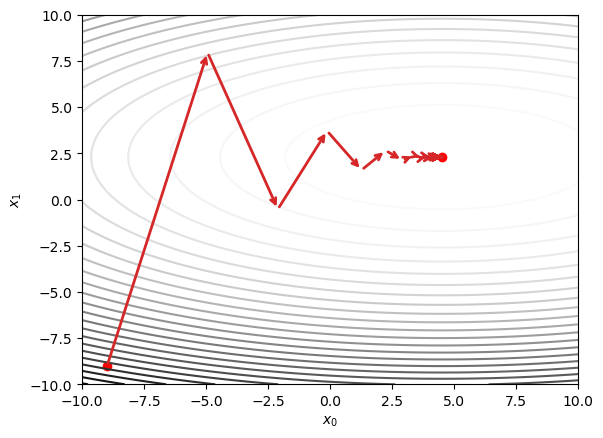

In [56]:
fig = plt.figure()
ax = fig.add_subplot()
ax.contour(X, Y, Z, 30, cmap='Greys')
ax.scatter(min_x0,min_x1,color = 'red')
ax.scatter(-9,-9,color = 'red')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
for count, value in enumerate(estimate) :
    if count == len(estimate)-1:
        break
    ax.annotate("",(value[0],value[1]),((estimate[count+1,0],estimate[count+1,1])),arrowprops = {'arrowstyle':'<-','color':'C3','linewidth':2})
plt.show()

In [25]:
estimate[0,0]

-9.0

In [27]:
estimate[0,1]

-9.0

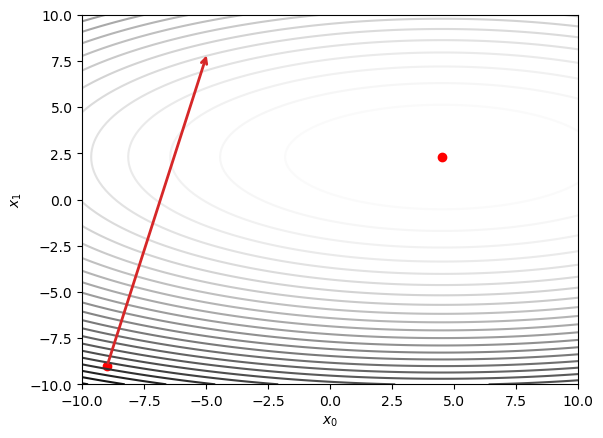

IndexError: index 73 is out of bounds for axis 0 with size 73

In [60]:
fig = plt.figure()
ax = fig.add_subplot()
ax.contour(X, Y, Z, 30, cmap='Greys')
ax.scatter(min_x0,min_x1,color = 'red')
ax.scatter(-9,-9,color = 'red')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
for count, value in enumerate(estimate) :
    if count == len(estimate)-1:
        break
    ax.annotate("",(value[0],value[1]),((estimate[count+1,0],estimate[count+1,1])),arrowprops = {'arrowstyle':'<-','color':'C3','linewidth':2})
    plt.pause(0.0001)
plt.show()

In [62]:
estimate[0,1]

-9.0

In [1]:
gradients

NameError: name 'gradients' is not defined